# Seaborn užduotys

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
mpg = sns.load_dataset('mpg')

In [7]:
mpg.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [78]:
mpg.shape

(398, 9)

**Reikšmės, kurios galbūt ne visai aiškios:**
* mpg - miles per gallon
* displacement - variklio tūris kubiniais coliais. Jei norite pasisunkinti, galite perkaičiuoti stulpelius europietiškais standartais :)

# 1 Atspausdinkite histogramą, kurioje matytųsi, kiek automobilių turi kokią akseleraciją. *Šioje ir kitose užduotyse žaiskite su stiliais ir spalvomis, taip, kaip jums patinka.*

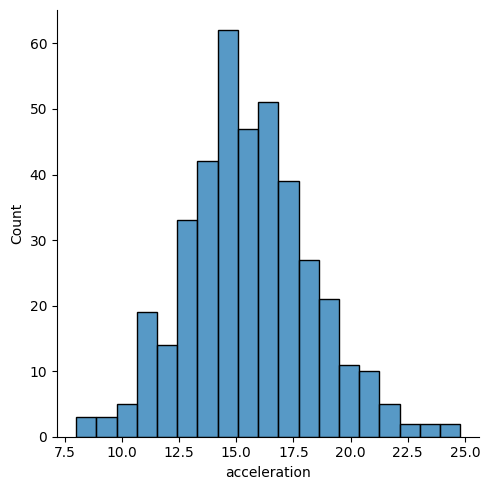

In [8]:
sns.displot(mpg['acceleration'])

# 2 Atspausdinkite histogramą, kurioje matytųsi, kiek automobilių turi kokius variklio tūrius.

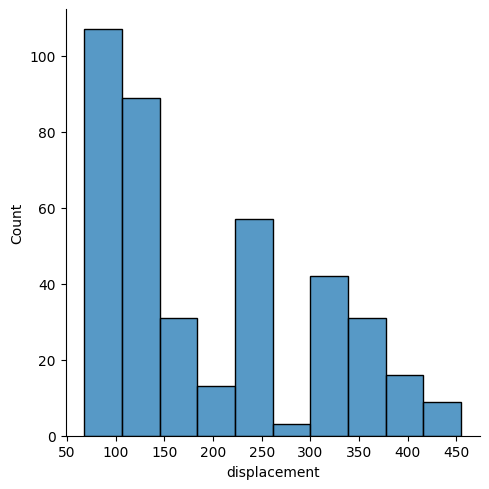

In [9]:
sns.displot(mpg['displacement'])

# 3 Atspausdinkite histogramą, kurioje matytųsi, kokie yra cilindrų skaičiaus variantai.

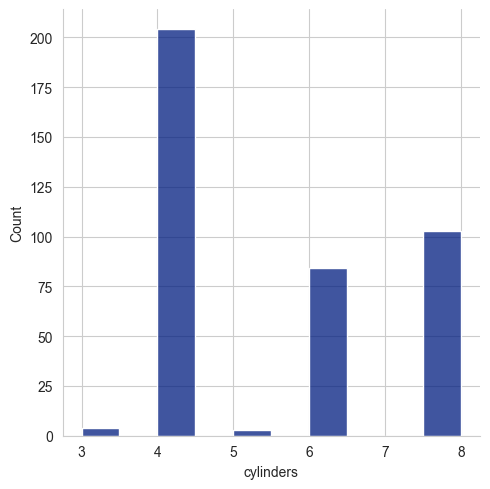

In [25]:
sns.set_palette('dark')
sns.displot(x='cylinders', data=mpg)

# 4 Atspausdinkite histogramą, kurioje matytųsi, kiek yra pagaminimo metų variantų

<Axes: xlabel='model_year', ylabel='count'>

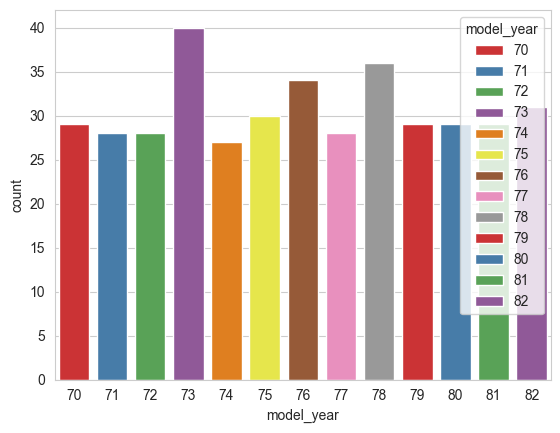

In [36]:
sns.countplot(x='model_year', data=mpg, hue = 'model_year', palette = 'Set1')

# 5 Atspausdinkite histogramą, kurioje matytųsi, kiek automobilių lentelėje kokia šalis pagamino.

<Axes: xlabel='origin', ylabel='count'>

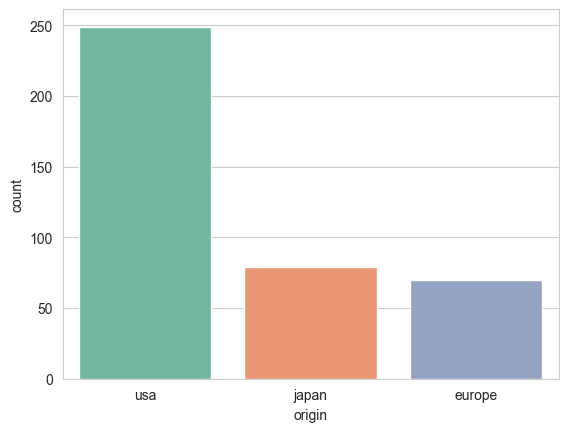

In [38]:
sns.countplot(x='origin', data = mpg, hue = 'origin', palette = 'Set2')

# 6 Atspausdinkite histogramą, kurioje matytųsi, koks kurioje šalyje pagamintų automobilių variklio tūrio vidurkis.

<Axes: xlabel='origin', ylabel='displacement'>

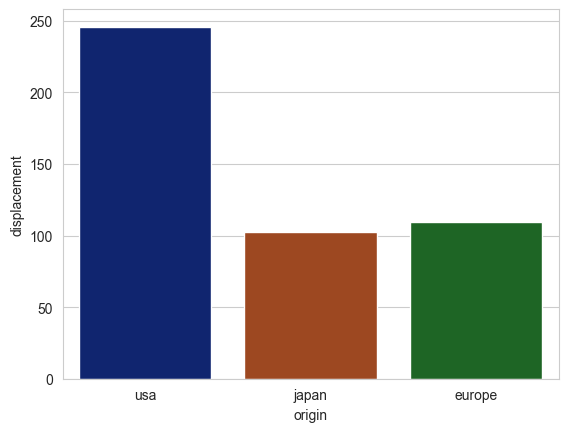

In [46]:
sns.barplot(x = 'origin', y = 'displacement', data = mpg, errorbar = ('ci', False), hue = 'origin')

# 6 Atspausdinkite sklaidos diagramą, kurios x ašis būtų 'displacement', y - 'acceleration', taip pat kiekvienas taškas atspindėtų šalį gamintoją ir cilindrų skaičių

<Axes: xlabel='displacement', ylabel='acceleration'>

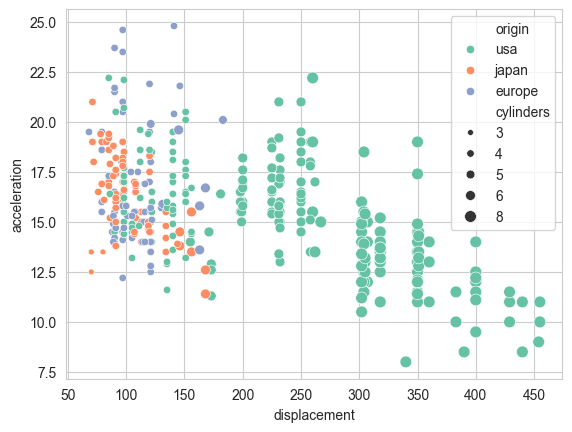

In [49]:
sns.scatterplot(x = 'displacement', y = 'acceleration',data = mpg, hue='origin', size='cylinders', palette="Set2")

# 7 Atspausdinkite visas įmanomas sklaidos diagramas lentelėje, kur pagal taško spalvą matytumėm šalį gamintoją. Kokias tendencijas galima aiškiai išskirti?

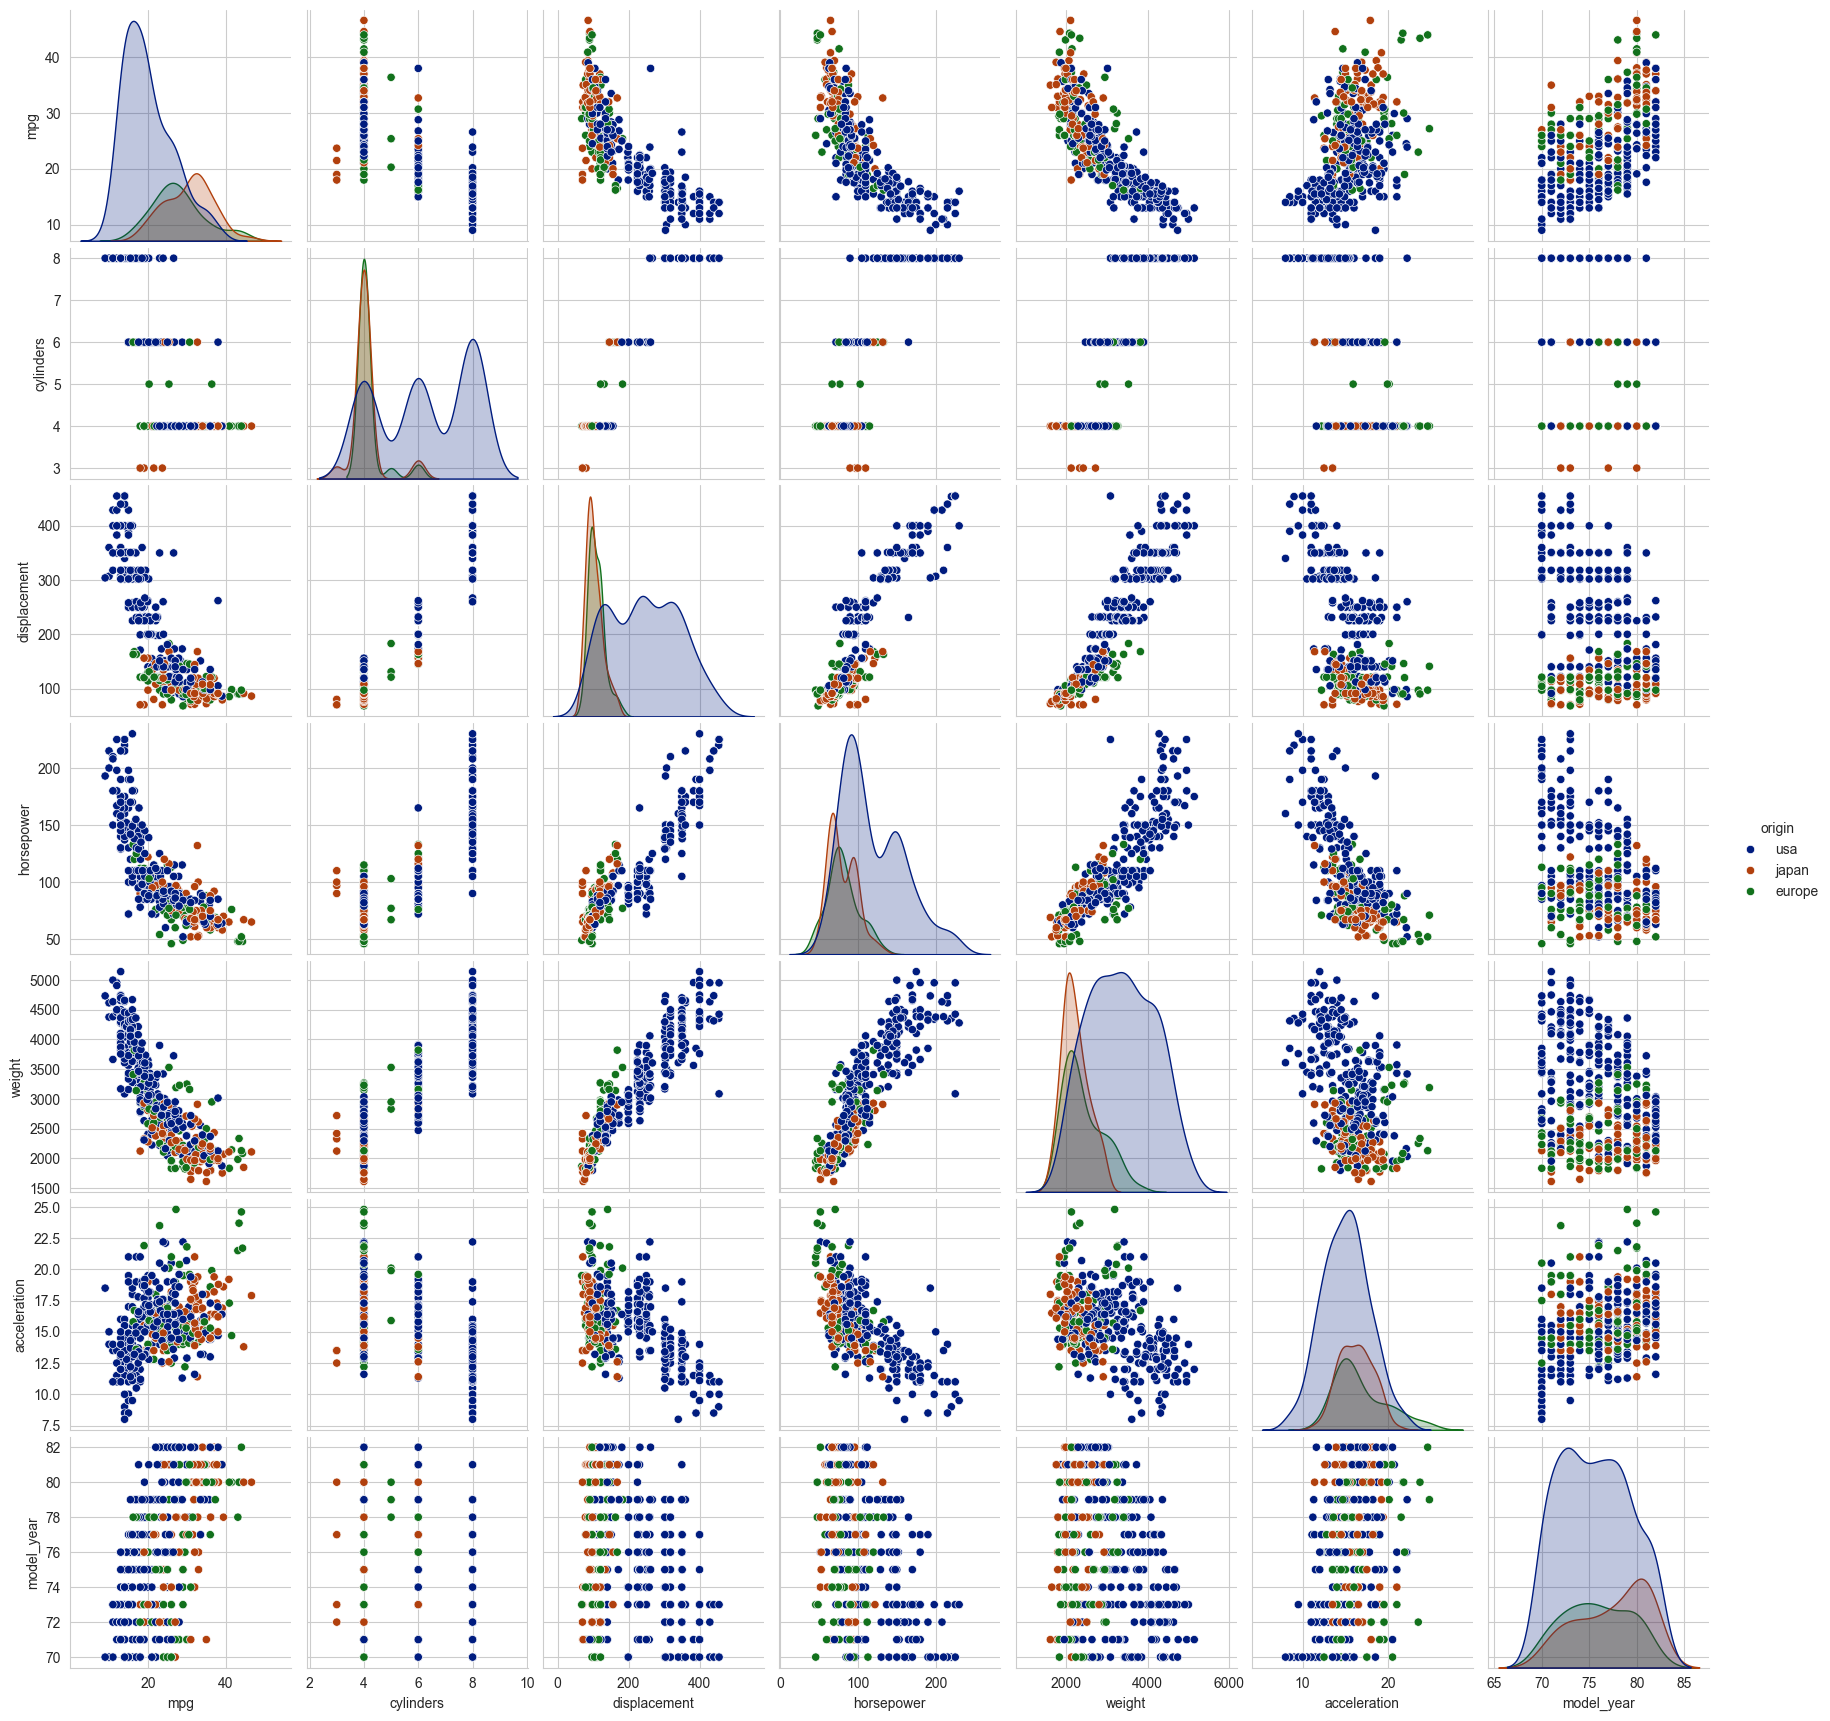

In [51]:
sns.pairplot(data = mpg, hue = 'origin')

# 8 Atspausdinkite stulpelinę diagramą, 'origin' x 'mpg'. Pabandykite interpretuoti rezultatą.

<Axes: xlabel='origin', ylabel='mpg'>

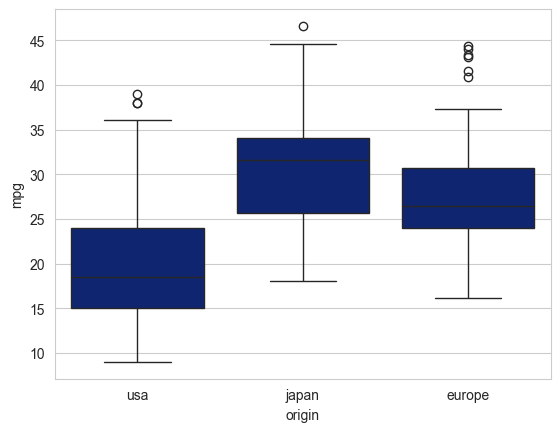

In [52]:
sns.boxplot(x='origin', y='mpg', data=mpg)

# 9 Sukurkite koreliacijų matricą. Jos pagrindu atspausdinkite mozaikinę diagramą.

In [53]:
koreliacija = mpg.corr(numeric_only=True)

In [54]:
koreliacija

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<Axes: >

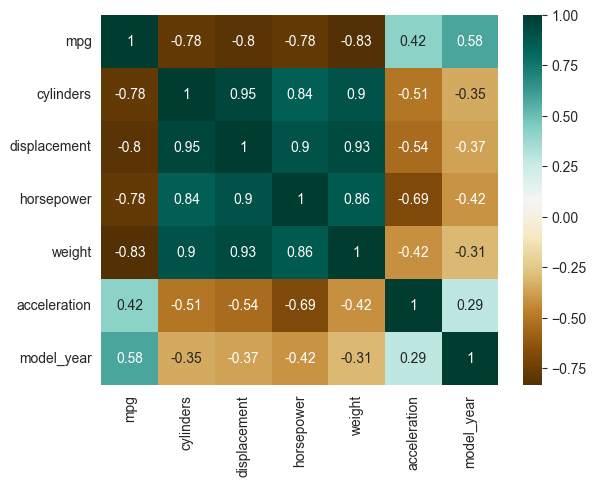

In [56]:
sns.heatmap(koreliacija, annot=True, cmap='BrBG')

# 10 Atspausdinkite sklaidos diagramų rinkinį, kuriame kiekviena lentelė pagal šalį rodytų 'acceleration' ir 'mpg' sąntykį.

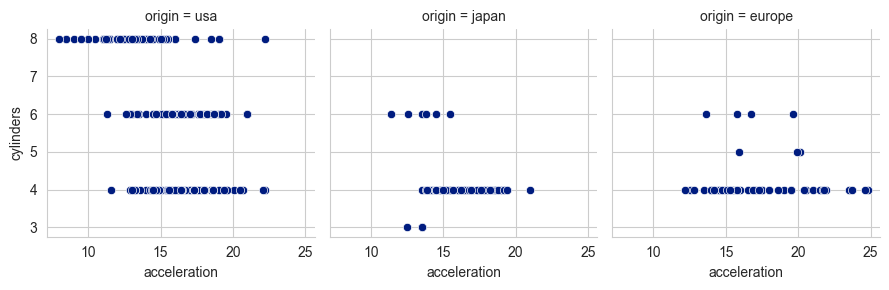

In [57]:
rinkinys = sns.FacetGrid(data=mpg, col='origin')
rinkinys.map(sns.scatterplot, 'acceleration', 'cylinders' )